In [63]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data = pd.read_csv('datasets/kc_house_data.csv')

#### 1. Crie uma coluna chamada: ”dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => “studio”
- Se o valor da coluna “bedrooms” for igual à 2 => “apartament”
- Se o valor da coluna “bedrooms” for maior que 2 => “house”

In [64]:
data['dormitory_type'] = ''
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,


In [65]:
data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartament
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house


#### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

<BarContainer object of 13 artists>

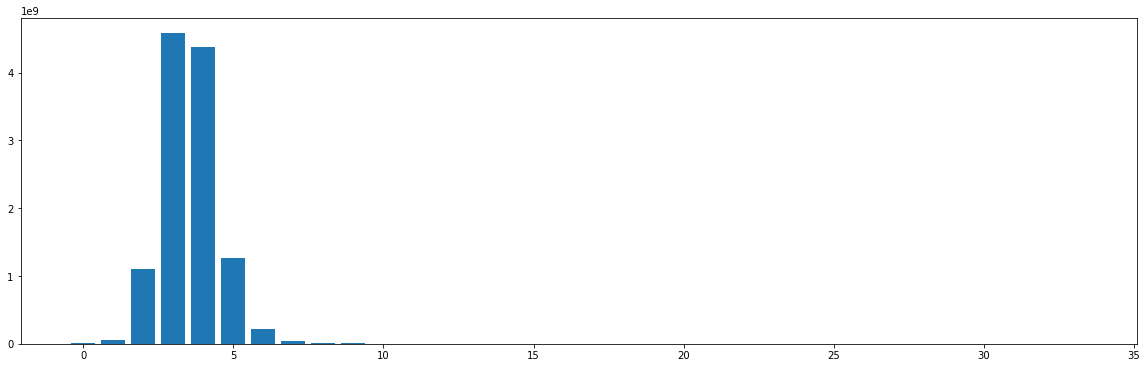

In [66]:
sum_price_by_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

plt.figure(figsize=(20,6))
plt.bar(sum_price_by_bedrooms['bedrooms'], sum_price_by_bedrooms['price'])

#### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

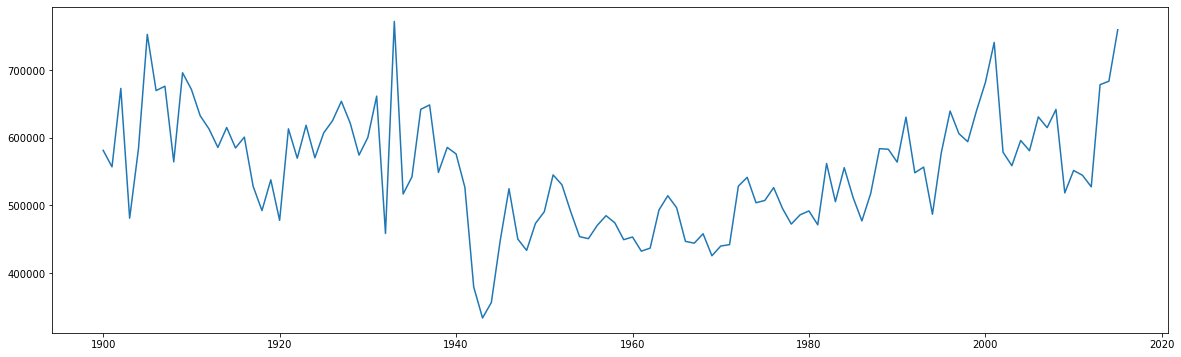

In [68]:
avg_price_by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(20,6))
plt.plot(avg_price_by_year['yr_built'], avg_price_by_year['price'])

#### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<BarContainer object of 4 artists>

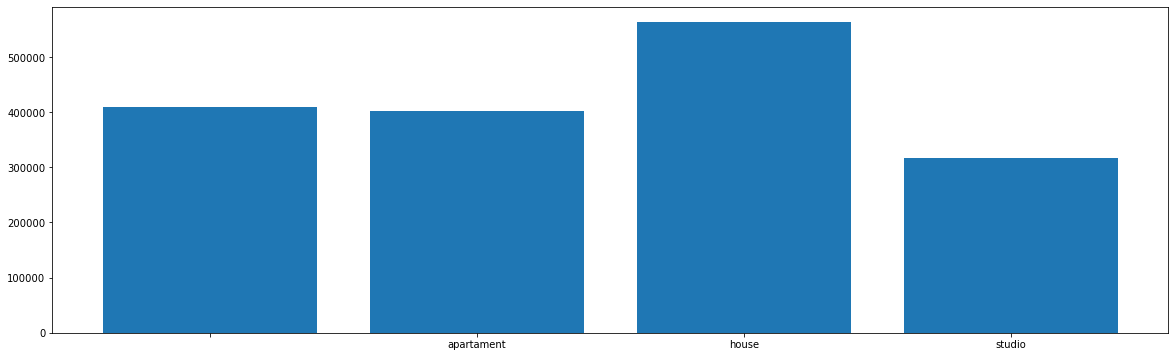

In [69]:
avg_prices_by_dormitory_type = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

plt.figure(figsize=(20,6))
plt.plot(avg_prices_by_dormitory_type['dormitory_type'], avg_prices_by_dormitory_type['price'])

#### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano 1930.

In [70]:
higher_1930 = data.query('yr_renovated >= 1930')
higher_1930

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
35,9547205180,20140613T000000,696000.00,3,2.50,2300,3060,1.50,0,0,...,1510,790,1930,2002,98115,47.68,-122.31,1590,3264,house
95,1483300570,20140908T000000,905000.00,4,2.50,3300,10250,1.00,0,0,...,2390,910,1946,1991,98040,47.59,-122.25,1950,6045,house
103,2450000295,20141007T000000,1088000.00,3,2.50,2920,8113,2.00,0,0,...,2920,0,1950,2010,98004,47.58,-122.20,2370,8113,house
115,3626039325,20141121T000000,740500.00,3,3.50,4380,6350,2.00,0,0,...,2780,1600,1900,1999,98117,47.70,-122.37,1830,6350,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.00,3,1.75,1760,6788,2.00,1,4,...,1760,0,1940,1960,98125,47.73,-122.28,1630,7588,house
20057,126039256,20140904T000000,434900.00,3,2.00,1520,5040,2.00,0,0,...,1520,0,1977,2006,98177,47.78,-122.36,1860,8710,house
20444,4305600360,20150225T000000,500012.00,4,2.50,2400,9612,1.00,0,0,...,1230,1170,1962,2009,98059,47.48,-122.13,2430,5539,house
20447,3319500628,20150212T000000,356999.00,3,1.50,1010,1546,2.00,0,0,...,1010,0,1971,2014,98144,47.60,-122.31,1010,1517,house


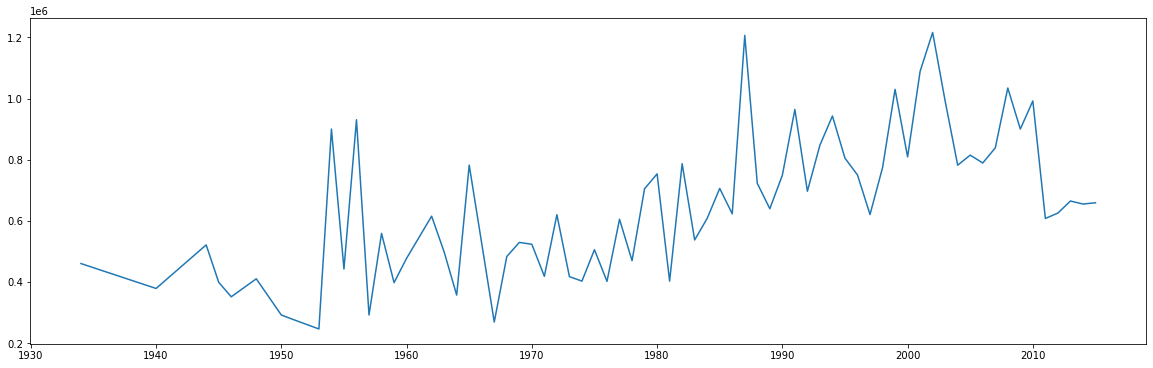

In [71]:
evo_avg_prices_by_year_renovated = higher_1930[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

plt.figure(figsize=(20,6))
plt.plot(evo_avg_prices_by_year_renovated['yr_renovated'], evo_avg_prices_by_year_renovated['price'])

#### 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [72]:
data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type          
1900     apartament     589533.33
         house          584854.27
         studio         398944.00
1901     apartament     452856.40
         house          578619.17
...                           ...
2014     house          692687.72
         studio         516500.00
2015     apartament     543250.00
         house          797383.06
         studio         385195.00

[314 rows x 1 columns]

#### 7. Crie um Dashboard com  os gráficos das questões 2, 3, 4 (Dashboard: 1 Linha e 2 Colunas)

<BarContainer object of 4 artists>

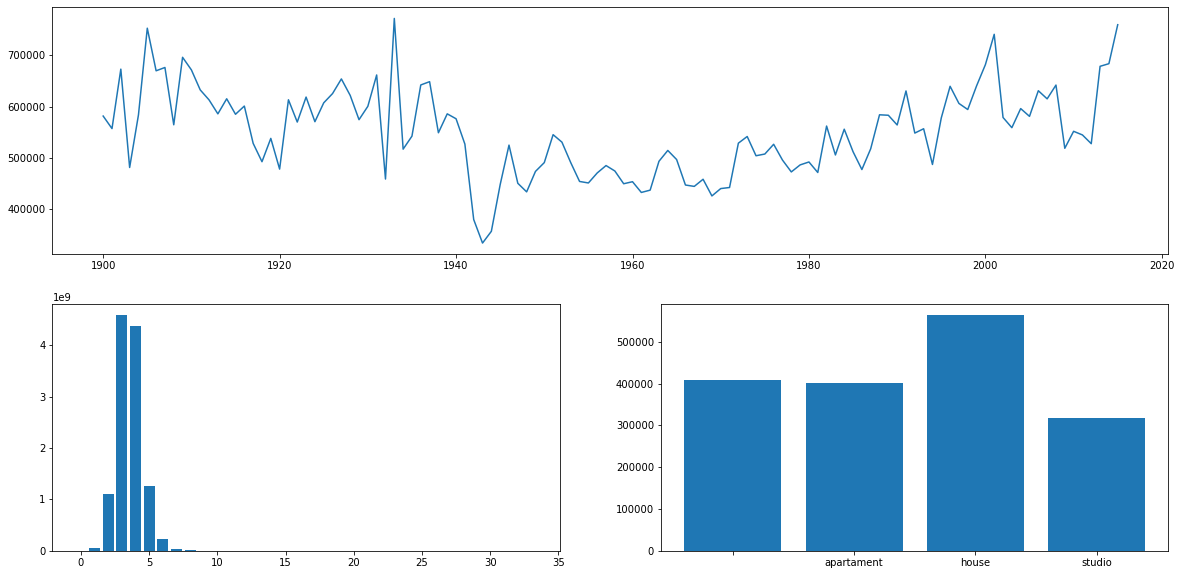

In [84]:
fig = plt.figure(figsize=(20,10))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

# Primeiro gráfico
avg_price_by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(avg_price_by_year['yr_built'], avg_price_by_year['price'])

# Segundo gráfico
sum_price_by_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax2.bar(sum_price_by_bedrooms['bedrooms'], sum_price_by_bedrooms['price'])

# Terceiro gráfico
avg_prices_by_dormitory_type = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(avg_prices_by_dormitory_type['dormitory_type'], avg_prices_by_dormitory_type['price'])

#### 8. Crie um Dashboard com  os gráficos das questões 2, 4 (Dashboard: 2 Colunas)


<BarContainer object of 4 artists>

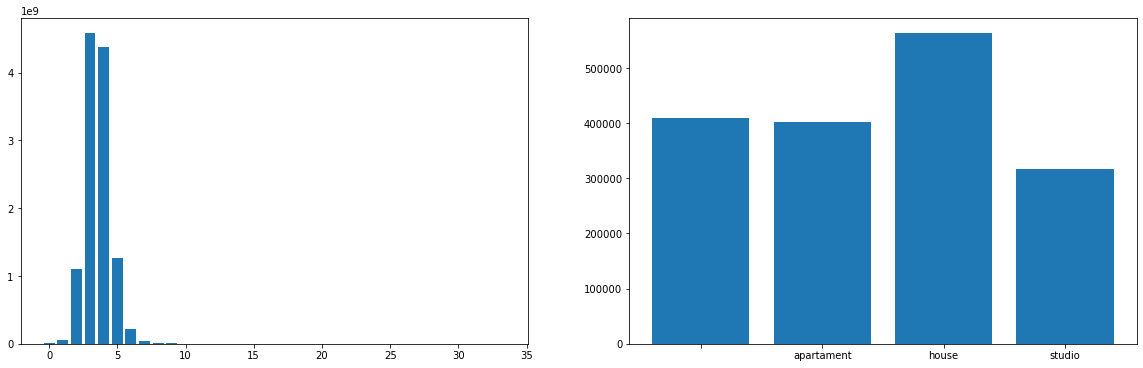

In [83]:
fig = plt.figure(figsize=(20,6))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

# Primeiro gráfico
sum_price_by_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(sum_price_by_bedrooms['bedrooms'], sum_price_by_bedrooms['price'])

# Segundo gráfico
avg_prices_by_dormitory_type = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar(avg_prices_by_dormitory_type['dormitory_type'], avg_prices_by_dormitory_type['price'])


#### 9. Crie um Dashboard com  os gráficos das questões 3, 5 (Dashboard: 2 Linhas)

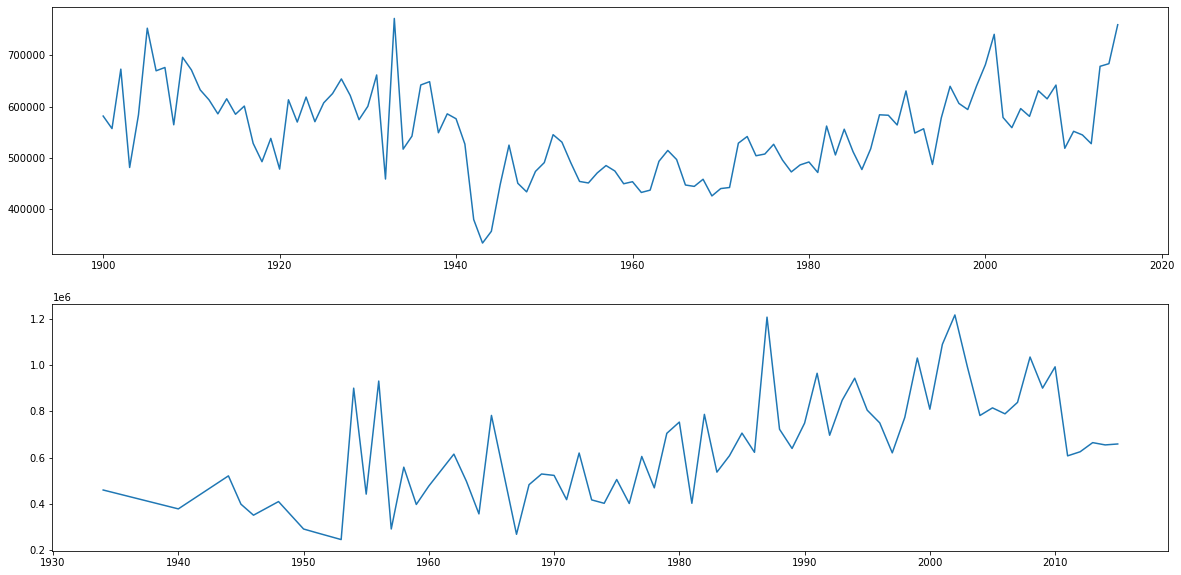

In [87]:
fig = plt.figure(figsize=(20,10))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

# Primeiro gráfico
avg_price_by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(avg_price_by_year['yr_built'], avg_price_by_year['price'])

# Segundo gráfico
evo_avg_prices_by_year_renovated = higher_1930[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(evo_avg_prices_by_year_renovated['yr_renovated'], evo_avg_prices_by_year_renovated['price'])

#### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar